#Árbol de Decisión
```
Versión   : 1.1, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2022.
Proposito : Implementación de Árbol de Decisión
Problema  : Clasificación de 3 especies den iris
```

#1. Librería

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics

# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#2. Leer datos

In [ ]:

url = 'https://raw.githubusercontent.com/yudith1234/pandas/main/digito16x16.csv'

datos = pd.read_csv(url, sep=',')
datos.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p248,p249,p250,p251,p252,p253,p254,p255,p256,digito
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


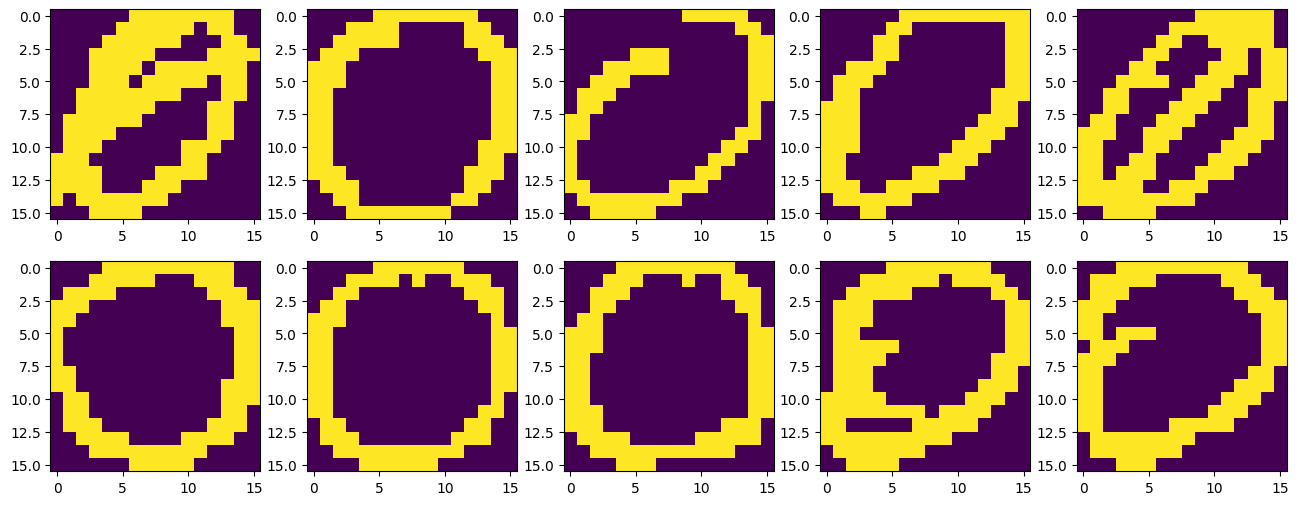

In [ ]:
x = datos.drop(['digito'], axis=1)
ran = x.shape[0]-1

fig, ax = plt.subplots(2, 5, figsize=(16,6))
i = -1
for k in range(2):
    for j in range(5):
        i = i + 1
        img = np.array(x.iloc[i].values)
        img = np.array(img).reshape(16, 16)
        ax[k,j].imshow(img)
plt.show()

#5. Distribución de clases

In [ ]:
print(datos.groupby('digito').size())

digito
0    161
1    162
2    159
3    159
4    161
5    159
6    161
7    158
8    155
9    158
dtype: int64


#6. Separación de datos, para entrenamiento y test

In [ ]:
X = datos.drop(['digito'], axis = 1)
y = datos['digito']

# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8)
X_train

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p247,p248,p249,p250,p251,p252,p253,p254,p255,p256
1579,0,0,0,0,0,0,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
401,0,0,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
585,0,0,0,0,1,1,1,1,1,1,...,0,1,1,0,0,0,0,0,0,0
1471,0,0,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
448,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,0,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
941,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
534,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


#7. Entrenamiento del árbol de decisión

In [ ]:
# Crear el obj árbol de decisión
# HIPERPARAMETROS
#================
# Indice de impuresa GINI: (criterion)
# Máxima profundiad del árbol:  (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion = 'gini', max_depth=6)

# entrenar el árbol de decisión
ArbolDecision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

# Test AD

In [ ]:
ArbolDecision.score(X_test, y_test)

0.7147335423197492

#8. Gráfica del árbol de decisión

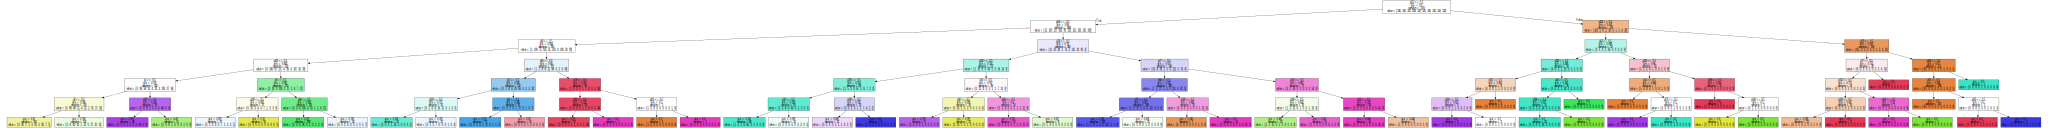

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=X.columns, filled=True))
SVG(graph.pipe(format="svg"))

#8. Test

In [ ]:
pred = ArbolDecision.predict(X_test)
print(pred)
print(y_test)

[3 6 7 6 1 9 2 4 2 2 2 6 5 5 2 1 4 4 8 6 3 5 4 2 5 3 4 2 9 2 4 5 4 1 4 4 1
 3 5 2 1 4 5 4 3 6 1 3 3 2 9 6 5 3 0 4 2 3 5 2 9 2 2 4 0 5 6 6 6 5 2 2 7 6
 6 1 1 5 9 8 2 5 4 1 1 9 0 9 2 1 9 7 5 6 6 5 5 6 4 2 5 0 9 2 2 3 1 5 2 6 2
 3 8 2 1 1 2 1 4 8 7 2 1 6 0 3 8 6 6 1 5 5 5 4 7 0 6 0 3 6 6 5 2 9 5 6 2 2
 5 1 4 9 9 7 0 8 5 3 1 6 0 1 4 2 1 3 0 2 5 1 2 1 3 5 1 1 4 2 5 4 4 7 3 5 1
 7 0 1 4 6 6 2 9 4 5 2 8 4 1 1 2 5 4 2 5 8 3 7 6 2 4 6 2 5 4 9 6 0 1 6 5 0
 0 4 4 2 8 6 3 3 8 1 2 1 1 1 6 9 9 3 2 1 1 6 0 1 4 1 9 9 2 0 2 2 4 5 9 3 2
 6 7 2 1 9 6 5 1 0 8 7 4 4 2 9 2 2 8 4 3 6 9 3 9 1 0 5 2 1 4 4 5 6 4 5 8 9
 3 9 5 6 2 0 2 3 2 2 5 8 3 0 1 1 9 0 0 5 3 6 4]
607     3
1103    6
1157    7
436     2
200     1
       ..
103     0
932     5
569     3
982     6
754     4
Name: digito, Length: 319, dtype: int64


#9. Matriz de confusión y métricas

In [ ]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[21  0  0  0  2  0  1  0  0  1]
 [ 0 22  6  0  3  0  0  0  0  1]
 [ 0  2 28  1  1  2  2  0  2  0]
 [ 0  1  1 25  0  4  0  0  0  0]
 [ 0  1  0  1 25  2  2  0  0  1]
 [ 0  2  5  1  1 23  1  1  0  0]
 [ 0  0  0  0  0  0 32  1  2  0]
 [ 0  9  3  0  2  1  0  9  0  1]
 [ 1  6  8  0  2  3  0  0 10  1]
 [ 0  1  4  0  3  7  0  0  0 21]]
Exactitud =  0.677115987460815


<Axes: >

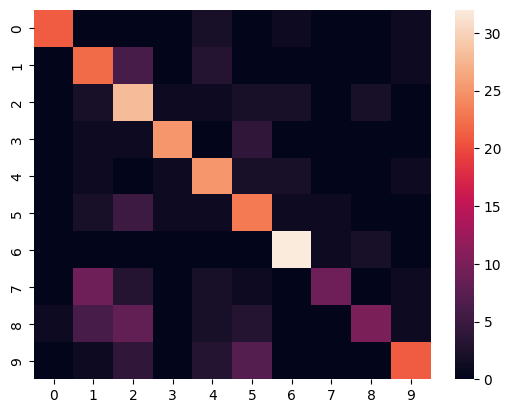

In [ ]:
categorias = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias)

#10. Predicción

In [ ]:
nuevo = np.array([[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
                   0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,
                   1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,
                   1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,
                   1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,
                   0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,
                   0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,
                   1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,
                   1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,
                   1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,
                   1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,
                   1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,
                   1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,
                   0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]])
pred = ArbolDecision.predict(nuevo)
print(pred)

[6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


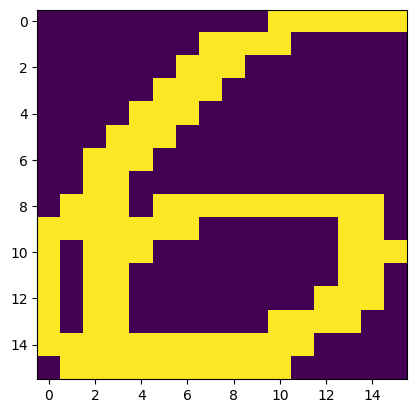

In [ ]:
nuevo = np.array([[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1],
                   [0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0],
                   [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
                   [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0],
                   [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0],
                   [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0],
                   [1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0],
                   [1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1],
                   [1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0],
                   [1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0],
                   [1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0],
                   [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
                   [0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]])
plt.imshow(nuevo)

#TAREA:

Realizar las adecuaciones necesarias del presente codigo fuente de árbol de decisión para entrenar, testear y predecir datos, utilizando los dataset: : **Microorganismos, winequality.csv**
